In [162]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.style.use('seaborn') # matplotlib 테마

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0. Load Data

In [163]:
dataset = pd.read_csv('ggstore_train.csv')
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4


In [164]:
dataset.describe()

,Rating,Reviews,Size,Installs,Type,Price,Id
count,5616.000000,5.616000e+03,5616.000000,5.616000e+03,5616.000000,5616.000000,5616.000000
mean,4.177386,1.686437e+05,21.831198,5.201445e+06,0.078526,1.409918,2807.500000
std,0.543153,1.126012e+06,22.744877,3.012485e+07,0.269021,20.341193,1621.343887
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,1.140000e+02,5.100000,1.000000e+04,0.000000,0.000000,1403.750000
50%,4.300000,2.158000e+03,13.000000,1.000000e+05,0.000000,0.000000,2807.500000
75%,4.500000,3.292125e+04,30.000000,1.000000e+06,0.000000,0.000000,4211.250000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,1.000000,400.000000,5615.000000


In [165]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
App               5616 non-null object
Category          5616 non-null object
Rating            5616 non-null float64
Reviews           5616 non-null int64
Size              5616 non-null float64
Installs          5616 non-null float64
Type              5616 non-null int64
Price             5616 non-null float64
Content Rating    5616 non-null object
Genres            5616 non-null object
Last Updated      5616 non-null object
Id                5616 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [166]:
dataset.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Id                0
dtype: int64

결측치는 존재하지 않는다.

# 1. Preprocessing

In [167]:
# Column별로 unique한 데이터의 개수를 출력하였다. 
# 이 때, unique한 데이터의 개수가 너무 많으면 앞과 뒤에서 5개씩만 print한다.
print('<Unique Value per Columns>')
for i in dataset.columns:
    print('*{} : {}'.format(i, len(np.unique(dataset[i]))), end = '\n\t')
    if (len(np.unique(dataset[i])) > 10):
        print(np.unique(dataset[i])[:5], end ='...')
        print(np.unique(dataset[i])[-5:])
    else:
        print(np.unique(dataset[i]))

<Unique Value per Columns>
*App : 5616
	['+Download 4 Instagram Twitter' '- Free Comics - Comic Apps' '.R'
 '/u/app' '058.ba']...['감성학원 BL 첫사랑' "💎 I'm rich"
 '💘 WhatsLov: Smileys of love, stickers and GIF'
 '📏 Smart Ruler ↔️ cm/inch measuring for homework!'
 '🔥 Football Wallpapers 4K | Full HD Backgrounds 😍']
*Category : 33
	['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS']...['SPORTS' 'TOOLS' 'TRAVEL_AND_LOCAL' 'VIDEO_PLAYERS' 'WEATHER']
*Rating : 38
	[1.  1.4 1.5 1.6 1.7]...[4.6 4.7 4.8 4.9 5. ]
*Reviews : 3697
	[1 2 3 4 5]...[17712922 22426677 23133508 27722264 44891723]
*Size : 352
	[0.0085 0.014  0.017  0.02   0.023 ]...[ 96.  97.  98.  99. 100.]
*Installs : 19
	[  1.   5.  10.  50. 100.]...[1.e+07 5.e+07 1.e+08 5.e+08 1.e+09]
*Type : 2
	[0 1]
*Price : 61
	[0.   0.99 1.29 1.49 1.5 ]...[299.99 379.99 389.99 399.99 400.  ]
*Content Rating : 6
	['Adults only 18+' 'Everyone' 'Everyone 10+' 'Mature 17+' 'Teen' 'Unrated']
*Genres : 106
	['Action' 'Action;

In [168]:
# Last Updated를 년, 월, 일로 분리한다.
dataset['Year'] = dataset['Last Updated'].apply(lambda x: int(x[:4]))
dataset['Month'] = dataset['Last Updated'].apply(lambda x: int(x[5:7]))
dataset['Day'] = dataset['Last Updated'].apply(lambda x: int(x[8:10]))
dataset['Content Rating'] = dataset['Content Rating'].map({'Unrated': 0, 'Everyone': 1, 'Teen': 2, 'Everyone 10+': 3, 'Mature 17+': 4, 'Adults only 18+':5})
dataset.drop(['Last Updated', 'Id', 'Type'], axis = 'columns', inplace=True)
# Last Updated와 Id(단순 인덱스), Type(유 무료 여부)는 삭제한다.
dataset

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Year,Month,Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0.00,1,Art & Design,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0.00,1,Art & Design;Pretend Play,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0.00,1,Art & Design,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0.00,2,Art & Design,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0.00,1,Art & Design;Creativity,2018,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...
5611,Dr. Chess,GAME,4.1,97209,6.7,1000000.0,0.00,1,Board,2018,1,14
5612,Super Dr. Parking 3D,FAMILY,4.0,4518,41.0,1000000.0,0.00,1,Simulation,2017,12,17
5613,Dr Dre - Beatmaker,GAME,4.3,146,6.0,10000.0,0.00,4,Music,2018,2,28
5614,Dr. Cares - Amy's Pet Clinic 🐈 🐕,FAMILY,4.5,3580,60.0,100000.0,0.00,1,Casual,2018,4,30


## 1-1. 이상치 처리 및 EDA

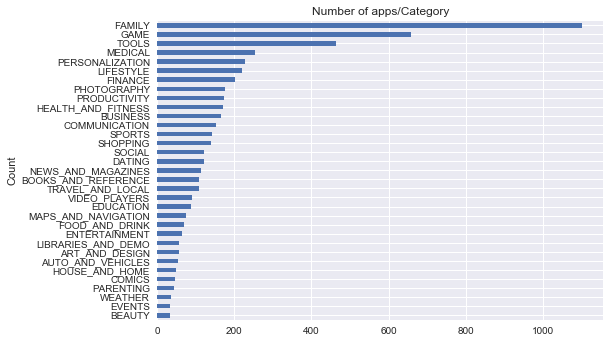

In [169]:
dataset.groupby('Category').count()["App"].sort_values(ascending=True).plot(kind='barh',title='Number of apps/Category', fontsize=10)
plt.ylabel('Count') 
plt.show()

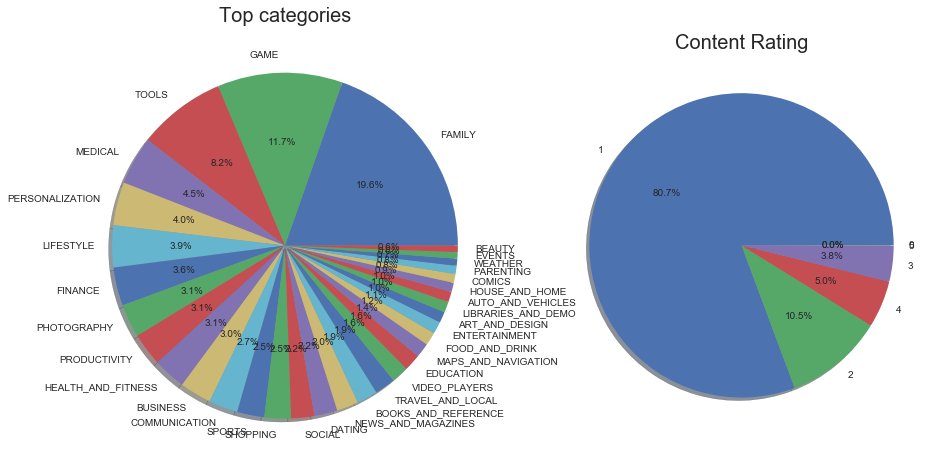

In [170]:
f, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))

labels = dataset['Category'].value_counts(sort = True).index
sizes = dataset['Category'].value_counts(sort = True)
axes[0].pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
axes[0].set_title('Top categories',size = 20)
# axes[0].legend(labels, loc="best")
axes[0].axis('equal')
# axes[0].tight_layout()

labels = dataset['Content Rating'].value_counts(sort = True).index
sizes = dataset['Content Rating'].value_counts(sort = True)
axes[1].pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
axes[1].set_title('Content Rating',size = 20)


plt.show()

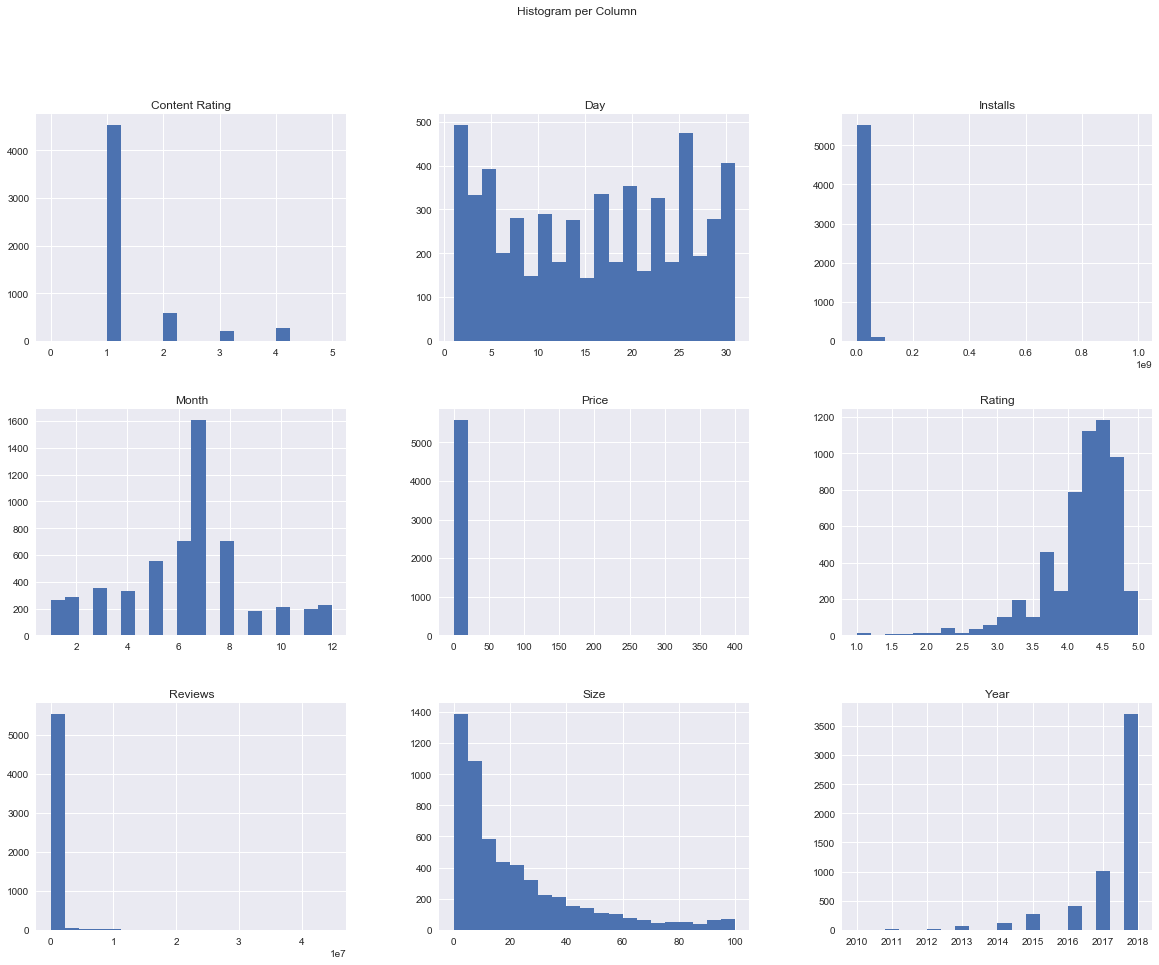

In [171]:
dataset[dataset.columns].hist(bins=20, figsize=(20,15))
plt.suptitle("Histogram per Column", fontsize=12)
plt.show()

In [172]:
dataset.sort_values(by=['Reviews'], axis=0, ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Year,Month,Day
975,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,0.00,3,Strategy,2018,7,15
960,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,0.00,3,Arcade,2018,7,12
965,Clash Royale,GAME,4.6,23133508,97.0,1.000000e+08,0.00,3,Strategy,2018,6,27
961,Candy Crush Saga,GAME,4.4,22426677,74.0,5.000000e+08,0.00,1,Casual,2018,7,5
247,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0,5.000000e+08,0.00,2,Communication,2018,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5.000000e+00,0.00,1,Medical,2018,8,2
4983,CT Checkout,FINANCE,5.0,1,8.4,5.000000e+01,0.00,1,Finance,2017,4,20
3160,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.0,1.000000e+01,4.99,1,Education,2018,4,4
3346,AP Art History Flashcards,FAMILY,5.0,1,96.0,1.000000e+01,29.99,4,Education,2016,1,19


In [173]:
dataset.sort_values(by=['Installs'], axis=0, ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Year,Month,Day
2115,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1.000000e+09,0.00,2,News & Magazines,2018,8,1
960,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,0.00,3,Arcade,2018,7,12
1827,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17.0,5.000000e+08,0.00,1,Tools,2018,7,30
3419,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70.0,5.000000e+08,0.00,1,Health & Fitness,2018,7,31
1973,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,5.000000e+08,0.00,1,Productivity,2018,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4853,CQ ESPM,BUSINESS,5.0,2,3.4,5.000000e+00,0.00,1,Business,2017,6,3
1440,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5.000000e+00,0.00,1,Medical,2018,8,2
1434,Tablet Reminder,MEDICAL,5.0,4,2.5,5.000000e+00,0.00,1,Medical,2018,8,3
1436,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1.000000e+00,0.00,1,Medical,2018,8,2


Review와 Installs가 큰 앱들에 대해 살펴보았지만, 큰 문제는 없는 것으로 보인다.

In [174]:
dataset.sort_values(by=['Price'], axis=0, ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Year,Month,Day
2510,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,400.00,1,Lifestyle,2018,5,3
3253,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,1000.0,399.99,1,Finance,2018,6,25
3236,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000.0,399.99,1,Finance,2017,11,12
3244,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000.0,399.99,2,Finance,2017,12,6
2506,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000.0,399.99,1,Lifestyle,2018,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1900,New Launcher 2018,PERSONALIZATION,4.4,142393,12.0,10000000.0,0.00,1,Personalization,2018,7,31
1899,"Color Call - Caller Screen, LED Flash",PERSONALIZATION,4.7,29485,9.9,1000000.0,0.00,1,Personalization,2018,7,20
1898,ZenUI Launcher,PERSONALIZATION,4.7,1141545,15.0,50000000.0,0.00,1,Personalization,2018,7,31
1897,Funny Alarm Clock Ringtones,PERSONALIZATION,4.5,15633,14.0,1000000.0,0.00,1,Personalization,2017,3,9


Price가 높은 순으로 정렬한 결과, 'I am rich'와 같이 아무 의미가 없는 앱들이 있는 것으로 보아 제거하고자 한다.

In [175]:
dataset['App'] = dataset['App'].apply(lambda x: x.lower()) # 먼저 모두 소문자로 바꿔준다.
dataset.query('App.str.contains("rich") or App.str.contains("millionaire") or App.str.contains("billionaire") or App.str.contains("expensive")', engine= 'python')

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Year,Month,Day
199,röhrich werner soundboard,COMICS,4.7,2249,32.000,500000.0,0.00,1,Comics,2017,11,16
320,sudy – meet elite & rich single,DATING,4.1,17268,40.000,500000.0,0.00,4,Dating,2018,6,25
325,millionaire match: rich singles dating app,DATING,3.9,852,27.000,100000.0,0.00,4,Dating,2018,7,30
1259,steam: rails to riches,FAMILY,4.2,214,67.000,5000.0,4.99,1,Board;Brain Games,2017,12,13
2392,most expensive app (h),FAMILY,4.3,6,1.500,100.0,399.99,1,Entertainment,2018,7,16
2506,💎 i'm rich,LIFESTYLE,3.8,718,26.000,10000.0,399.99,1,Lifestyle,2018,3,11
2510,i'm rich - trump edition,LIFESTYLE,3.6,275,7.300,10000.0,400.00,1,Lifestyle,2018,5,3
3232,i am rich,LIFESTYLE,3.8,3547,1.800,100000.0,399.99,1,Lifestyle,2018,1,12
3233,i am rich,FAMILY,3.9,1455,1.100,10000.0,0.00,1,Entertainment,2017,10,11
3234,i am rich plus,FAMILY,4.0,856,8.700,10000.0,399.99,1,Entertainment,2018,5,19


App 이름으로 rich를 가진 것들 중 의미가 없어 보이는 앱들을 제거해주었다.

In [176]:
dataset.drop(dataset.index[[2506, 2510, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3244, 3245,3246, 3249, 3253, 2392]], inplace = True)
dataset.sort_values(by=['Price'], axis=0, ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Year,Month,Day
1303,vargo anesthesia mega app,MEDICAL,4.6,92,32.0,1000.0,79.99,1,Medical,2018,6,18
1424,ltc as legal,MEDICAL,4.0,6,1.3,100.0,39.99,1,Medical,2018,4,4
1342,a manual of acupuncture,MEDICAL,3.5,214,68.0,1000.0,33.99,1,Medical,2017,10,2
1339,pta content master,MEDICAL,4.2,64,41.0,1000.0,29.99,1,Medical,2015,12,22
1314,emt pass,MEDICAL,3.4,51,2.4,1000.0,29.99,1,Medical,2014,10,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1894,"cm launcher 3d - theme, wallpapers, efficient",PERSONALIZATION,4.6,6702776,17.0,100000000.0,0.00,2,Personalization,2018,8,3
1893,launcher,PERSONALIZATION,4.5,102923,18.0,1000000.0,0.00,1,Personalization,2018,7,10
1892,golden launcher,PERSONALIZATION,4.4,32794,12.0,5000000.0,0.00,1,Personalization,2018,7,31
1891,3d live neon weed launcher,PERSONALIZATION,4.5,1724,21.0,100000.0,0.00,4,Personalization,2018,6,26


In [177]:
categories = np.unique(dataset.Category)
print(len(categories))
categories

33


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [178]:
genres = np.unique(dataset.Genres)
print(len(genres))
genres

106


array(['Action', 'Action;Action & Adventure', 'Adventure',
       'Adventure;Action & Adventure', 'Adventure;Brain Games',
       'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
       'Arcade;Pretend Play', 'Art & Design', 'Art & Design;Creativity',
       'Art & Design;Pretend Play', 'Auto & Vehicles', 'Beauty', 'Board',
       'Board;Action & Adventure', 'Board;Brain Games',
       'Board;Pretend Play', 'Books & Reference',
       'Books & Reference;Education', 'Business', 'Card',
       'Card;Action & Adventure', 'Casino', 'Casual',
       'Casual;Action & Adventure', 'Casual;Brain Games',
       'Casual;Creativity', 'Casual;Education', 'Casual;Music & Video',
       'Casual;Pretend Play', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education',
       'Education;Action & Adventure', 'Education;Brain Games',
       'Education;Creativity', 'Education;Education',
       'Education;Music & Video', 'Education;Pretend Play', 'Educational',
       'Educ

Genres는 ;를 기준으로 1차 분류와 2차 분류가 존재하는 것으로 보인다.

In [179]:
dataset['Genre1'] = dataset['Genres'].apply(lambda x: x.split(';')[0])
dataset['Genre2'] = dataset['Genres'].apply(lambda x: x.split(';')[1] if len(x.split(';'))>1 else np.nan)
dataset.drop(['Genres'], axis = 'columns', inplace=True)
dataset

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Year,Month,Day,Genre1,Genre2
0,photo editor & candy camera & grid & scrapbook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0.00,1,2018,1,7,Art & Design,NaN
1,coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0.00,1,2018,1,15,Art & Design,Pretend Play
2,"u launcher lite – free live cool themes, hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0.00,1,2018,8,1,Art & Design,NaN
3,sketch - draw & paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0.00,2,2018,6,8,Art & Design,NaN
4,pixel draw - number art coloring book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0.00,1,2018,6,20,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,dr. chess,GAME,4.1,97209,6.7,1000000.0,0.00,1,2018,1,14,Board,NaN
5612,super dr. parking 3d,FAMILY,4.0,4518,41.0,1000000.0,0.00,1,2017,12,17,Simulation,NaN
5613,dr dre - beatmaker,GAME,4.3,146,6.0,10000.0,0.00,4,2018,2,28,Music,NaN
5614,dr. cares - amy's pet clinic 🐈 🐕,FAMILY,4.5,3580,60.0,100000.0,0.00,1,2018,4,30,Casual,NaN


In [180]:
print(len(dataset))
dataset.isnull().sum()

5597


App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Year                 0
Month                0
Day                  0
Genre1               0
Genre2            5306
dtype: int64

총 5597개의 데이터 중, 5306개의 데이터가 2차분류가 존재하지 않으므로 2차 분류는 사용하지 않기로 한다.

In [181]:
dataset.drop(['Genre2'], axis = 'columns', inplace=True)

## 1-2. 새로운 feature 추가

In [182]:
dataset['Review Rate'] = dataset.Reviews / dataset.Installs
dataset.sort_values(by=['Review Rate'], axis=0, ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Year,Month,Day,Genre1,Review Rate
1436,kba-ez health guide,MEDICAL,5.0,4,25.0,1.0,0.00,1,2018,8,2,Medical,4.000000
3646,ra ga ba,GAME,5.0,2,20.0,1.0,1.49,1,2017,2,8,Arcade,2.000000
5468,dn blog,SOCIAL,5.0,20,4.2,10.0,0.00,2,2018,7,23,Social,2.000000
4176,brick breaker br,GAME,5.0,7,19.0,5.0,0.00,1,2018,7,23,Arcade,1.400000
4600,trovami se ci riesci,GAME,5.0,11,6.1,10.0,0.00,1,2017,3,11,Arcade,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,moto suggestions ™,TOOLS,4.6,308,4.3,1000000.0,0.00,1,2018,6,8,Tools,0.000308
170,secure folder,BUSINESS,3.8,14760,8.6,50000000.0,0.00,1,2018,1,31,Business,0.000295
1981,security & privacy,PRODUCTIVITY,4.0,212,10.0,1000000.0,0.00,1,2018,4,26,Productivity,0.000212
900,zenui safeguard,LIFESTYLE,4.5,100,7.1,1000000.0,0.00,1,2018,5,9,Lifestyle,0.000100


설치한 사람 중 리뷰를 남긴 사람의 비율을 의미하는 Review Rate라는 column을 추가하였다. 이를 내림차순으로 정렬한 결과, 1을 넘는 값들을 확인할 수 있었다. 이는, 설치한 유저의 수가 정확한 숫자로 나오는 것이 아니라 몇자리 수인지만 나오기 때문에 발생하는 문제로 추정된다. 모델의 성능에 큰 문제가 되지는 않을 것 같아 따로 전처리를 해주지는 않았다.

## 1-3. X와 y 분리

In [183]:
scaler = StandardScaler()

In [184]:
cat_att = ['Category', 'Genre1']
INT_encoding = {}
for cat in cat_att:
    INT_encoding[cat] = list(np.unique(dataset[cat]))
    dataset[cat] = dataset[cat].apply(lambda x: INT_encoding[cat].index(x))
dataset

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Year,Month,Day,Genre1,Review Rate
0,photo editor & candy camera & grid & scrapbook,0,4.1,159,19.0,10000.0,0.00,1,2018,1,7,3,0.015900
1,coloring book moana,0,3.9,967,14.0,500000.0,0.00,1,2018,1,15,3,0.001934
2,"u launcher lite – free live cool themes, hide ...",0,4.7,87510,8.7,5000000.0,0.00,1,2018,8,1,3,0.017502
3,sketch - draw & paint,0,4.5,215644,25.0,50000000.0,0.00,2,2018,6,8,3,0.004313
4,pixel draw - number art coloring book,0,4.3,967,2.8,100000.0,0.00,1,2018,6,20,3,0.009670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,dr. chess,14,4.1,97209,6.7,1000000.0,0.00,1,2018,1,14,6,0.097209
5612,super dr. parking 3d,11,4.0,4518,41.0,1000000.0,0.00,1,2017,12,17,38,0.004518
5613,dr dre - beatmaker,14,4.3,146,6.0,10000.0,0.00,4,2018,2,28,27,0.014600
5614,dr. cares - amy's pet clinic 🐈 🐕,11,4.5,3580,60.0,100000.0,0.00,1,2018,4,30,11,0.035800


one-hot encoding을 이용한 방법도 하였지만, integer encoding을 한 경우가 성능이 더 개선되었다. 이는 카테고리들 사이의 연관관계가 있는 것으로 추측되는데, one-hot encoding을 하는 경우 카테고리들의 연관관계를 반영하지 못하기 때문이라 추측된다. 아마, 카테고리들 사이의 연관관계를 잘 나타내는 int encoding을 하면 성능 향상에 도움이 될 것이라 여겨진다.

In [185]:
X = dataset.drop(['App', 'Rating', 'Day'], axis = 'columns')
y = dataset['Rating'].astype(np.float32)
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Category,Reviews,Size,Installs,Price,Content Rating,Year,Month,Genre1,Review Rate
0,-2.023400,-0.149901,-0.126551,-0.172647,-0.166526,-0.42819,0.563216,-2.059372,-1.574705,-0.242754
1,-2.023400,-0.149185,-0.346255,-0.156407,-0.166526,-0.42819,0.563216,-2.059372,-1.574705,-0.393139
2,-2.023400,-0.072447,-0.579140,-0.007260,-0.166526,-0.42819,0.563216,0.633870,-1.574705,-0.225504
3,-2.023400,0.041169,0.137093,1.484202,-0.166526,0.85891,0.563216,-0.135628,-1.574705,-0.367524
4,-2.023400,-0.149185,-0.838390,-0.169664,-0.166526,-0.42819,0.563216,-0.135628,-1.574705,-0.309839
...,...,...,...,...,...,...,...,...,...,...
5592,-0.309851,-0.063847,-0.667022,-0.139835,-0.166526,-0.42819,0.563216,-2.059372,-1.347327,0.632776
5593,-0.677040,-0.146036,0.840143,-0.139835,-0.166526,-0.42819,-0.303997,2.172865,1.078037,-0.365315
5594,-0.309851,-0.149913,-0.697780,-0.172647,-0.166526,3.43311,0.563216,-1.674623,0.244318,-0.256753
5595,-0.677040,-0.146868,1.675016,-0.169664,-0.166526,-0.42819,0.563216,-0.905125,-0.968364,-0.028472


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)

# 2. Train Model

In [187]:
def rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)**0.5

## 2-1. Voting Regressor

In [188]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB     
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import VotingRegressor

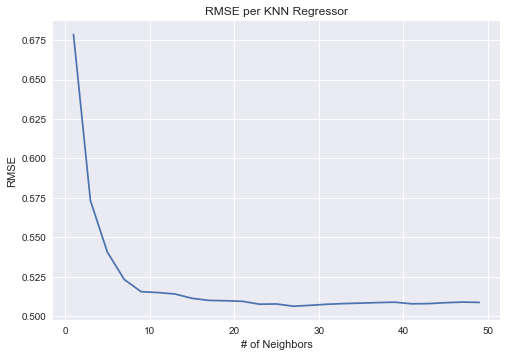

KNN Regressor with 27 neighbor has the lowest RMSE 0.5063184032616381


In [189]:
# KNeighborsRegressor
rmse_list = []
best_knn = None
for i in range(1, 50, 2):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    RMSE = rmse(knn, X_test, y_test)
    if len(rmse_list) > 0 and min(rmse_list) > RMSE:
        best_knn = knn
    rmse_list.append(RMSE)
#     print('test RMSE : {0:4f}'.format(RMSE))
plt.title('RMSE per KNN Regressor')
plt.plot(range(1, 50, 2), rmse_list)
plt.xlabel('# of Neighbors')
plt.ylabel('RMSE')
plt.show()
print('KNN Regressor with {} neighbor has the lowest RMSE {}'.format(range(1,50,2)[np.argmin(rmse_list)], min(rmse_list)))

In [225]:
#SGDRegressor
print('SGD Regressor', end='\t')
sgd = SGDRegressor()
sgd.fit(X_train,y_train)
RMSE = rmse(sgd, X_test, y_test)
print('test RMSE : {0:4f}'.format(RMSE))

#Decision Tree
print('DT Regressor', end='\t')
dt = DecisionTreeRegressor(random_state=318)
dt.fit(X_train,y_train)
RMSE = rmse(dt, X_test, y_test)
print('test RMSE : {0:4f}'.format(RMSE))

#SVR Regressor
print('SVR Regressor', end='\t')
svr = SVR()  #SVM for Regression : SVR
svr.fit(X_train,y_train)
RMSE = rmse(svr, X_test, y_test)
print('test RMSE : {0:4f}'.format(RMSE))

vo = VotingRegressor(estimators=[("SGD", sgd), ("dt",dt),("KNN",best_knn), ('SVR', svr)])

# Voting Regressor 학습/예측/평가
print('Voting Regressor', end='\t')
vo.fit(X_train,y_train)
RMSE = rmse(vo, X_test, y_test)
print('test RMSE : {0:4f}'.format(RMSE))

regressor = {'KNN': best_knn, 'SGD': sgd, 'DT': dt, 'SVR': svr}
weak = {'KNN': best_knn, 'SGD': sgd, 'DT': dt, 'SVR': svr}

SGD Regressor	test RMSE : 0.516756
DT Regressor	test RMSE : 0.682053
SVR Regressor	test RMSE : 0.507075
Voting Regressor	test RMSE : 0.505901


voting regressor를 이용한 결과 성능이 약간 더 좋아진 것을 볼 수 있다.

## 2-2. Bagging Regressor

In [191]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [226]:
params ={
    "n_estimators" : [3, 5, 10, 25],
    "max_samples" : [0.5, 0.7, 0.9, 1.0]}

for i in weak:
    print(i)
    grid = GridSearchCV(estimator=BaggingRegressor(regressor[i], oob_score=True), param_grid=params, cv=5, n_jobs=-1, scoring =rmse)
    grid = grid.fit(X_train, y_train)

    # best score & params
    print("\tbest score: ", grid.best_score_)  #최적의 스코어
    print("\tbest parameters: ", grid.best_params_) #최적의 파라미터

# oob score
    print("\toob score: ", grid.best_estimator_.oob_score_) #최적의 파라미터로 설정된 모델에서의 oob score
    RMSE = rmse(grid.best_estimator_, X_test, y_test)
    print('\ttest RMSE: {0:4f}'.format(RMSE))
    regressor[i+'_bagging'] = grid.best_estimator_

KNN
	best score:  0.5295781950780916
	best parameters:  {'max_samples': 1.0, 'n_estimators': 3}
	oob score:  -14.717212755577785
	test RMSE: 0.510795
SGD
	best score:  0.8372865258029553
	best parameters:  {'max_samples': 0.5, 'n_estimators': 5}
	oob score:  -0.43066988690876906
	test RMSE: 0.522891
DT
	best score:  0.5997510973139951
	best parameters:  {'max_samples': 0.7, 'n_estimators': 3}
	oob score:  -8.243318545197722
	test RMSE: 0.582754
SVR
	best score:  0.5244574447702716
	best parameters:  {'max_samples': 0.7, 'n_estimators': 3}
	oob score:  -7.509712116968341
	test RMSE: 0.510979


DT를 제외하고는 큰 성능 변화는 볼 수 없었다. 오히려 나머지들은 성능이 소폭 하락하는 현상도 발생하였다.

## 2-2. Random Forest

In [227]:
from sklearn.ensemble import RandomForestRegressor
params ={
    "n_estimators" : [ 20, 30, 50, 100, 150, 200],
    "max_features" : [1,2,3,4,5,6,7, 10, 15, 20, 25, X_train.shape[1]]
    }

grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100, max_features=2, n_jobs=-1, oob_score=True), param_grid=params, cv=5, n_jobs=-1, scoring =rmse)
grid = grid.fit(X_train, y_train)

# best score & params
print("best score: ", grid.best_score_)  #최적의 스코어
print("best parameters: ", grid.best_params_) #최적의 파라미터

# oob score
print("oob score: ", grid.best_estimator_.oob_score_) #최적의 파라미터로 설정된 모델에서의 oob score

best score:  0.5289789771280867
best parameters:  {'max_features': 10, 'n_estimators': 20}
oob score:  -0.014494478432155233


In [228]:
regressor['RF'] = grid.best_estimator_
y_pred = grid.best_estimator_.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.5032680951333991

Random Forest의 RMSE는 0.5033으로 Decision Tree를 사용하였을 때보다 개선이 조금 일어났다.

In [229]:
for i in np.argsort(regressor['RF'].feature_importances_)[::-1][:10]:
    print(X.columns[i], '\t', grid.best_estimator_.feature_importances_ [i])

Review Rate 	 0.2393649897545857
Reviews 	 0.2130463031988043
Size 	 0.1640726332585335
Month 	 0.09142241872654626
Genre1 	 0.09000855848760574
Category 	 0.07199241082748707
Installs 	 0.04787422343614074
Year 	 0.04406171558078888
Content Rating 	 0.020157909630572332
Price 	 0.017998837098935447


Feature Importance가 높은 상위 10개의 feature들을 출력하였다.

## 2-3. AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostRegressor

params = {"base_estimator__max_features" : [1,2,3,4,5,6,7, 10, 15, 20, 25, X_train.shape[1]],
          "base_estimator__max_depth" : [1,2, 3],
          "n_estimators": [5, 10, 25, 50, 100, 300, 500]}

adaregr = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=2, criterion='mse'), n_estimators=500,
    learning_rate=0.1, random_state=318)

grid = GridSearchCV(estimator=adaregr, param_grid=params, cv=5, n_jobs=-1, scoring =rmse).fit(X_train, y_train)

# best score & params
print("best score: ", grid.best_score_)  #최적의 스코어
print("best parameters: ", grid.best_params_) #최적의 파라미터

regressor['ADA'] = grid.best_estimator_
y_pred = grid.best_estimator_.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

best score:  0.5592998090191944
best parameters:  {'base_estimator__max_depth': 1, 'base_estimator__max_features': 2, 'n_estimators': 100}


0.5503388340711963

In [67]:
for i in np.argsort(regressor['ADA'].feature_importances_)[::-1][:10]:
    print(X.columns[i], '\t', grid.best_estimator_.feature_importances_ [i])

Review Rate 	 0.2761761581454521
Reviews 	 0.21042880446746418
Year 	 0.18518601804984863
Month 	 0.1012954819634172
Genre1 	 0.06417746727220108
Size 	 0.06291621020530475
Installs 	 0.060990589645849656
Category 	 0.023048703559580552
Content Rating 	 0.015780566690881976
Price 	 0.0


AdaBoost의 Feature Importance는 앞의 Random Forest와 유사하게 나타났지만 성능은 조금 더 떨어진다.

## 2-4. LGBM

In [232]:
import lightgbm as lgb

In [233]:
params = {
    'max_depth': [-1, 4, 8, 12, 20],
    'booster': ['gbdt', 'rf', 'dart', 'goss'],
    'feature_fraction':[0.5, 0.7, 1.0],
    'bagging_fraction': [0.3, 0.7, 1.0]
}

lgbm = lgb.LGBMRegressor(n_estimators=5000, max_depth=5, learning_rate=0.1, eval_metric='l2', num_iterations = 1000)
grid = GridSearchCV(estimator=lgbm, param_grid=params, cv=5, n_jobs=-1, scoring =rmse, ).fit(X_train, y_train)
# best score & params
print("best score: ", grid.best_score_)  #최적의 스코어
print("best parameters: ", grid.best_params_) #최적의 파라미터

best score:  0.5568839836811565
best parameters:  {'bagging_fraction': 0.3, 'booster': 'gbdt', 'feature_fraction': 1.0, 'max_depth': 8}


In [234]:
regressor['LGBM'] =grid.best_estimator_.set_params(learning_rate=0.005).fit(X_train, y_train)
print("test RMSE: ", rmse(regressor['LGBM'], X_test, y_test))
print("\n<Feature Importance>")
for i in np.argsort(regressor['LGBM'].feature_importances_)[::-1][:10]:
    print(X.columns[i], '\t', regressor['LGBM'].feature_importances_ [i])

test RMSE:  0.48640793332790544

<Feature Importance>
Reviews 	 7103
Review Rate 	 5047
Size 	 5013
Genre1 	 3078
Category 	 3008
Month 	 1717
Installs 	 1615
Year 	 1503
Price 	 841
Content Rating 	 575


LightGB를 사용하였으며, gridSearch를 이용하여 최적의 파라미터셋을 찾았다. 이 후 learning rate를 줄여 다시 training시켜서 정확도를 올리고자 하였다. test RMSE는 0.4864이다.

## 2-5. Stacking by using vecstack

In [235]:
def rmse_(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)**0.5

In [236]:
from vecstack import StackingTransformer
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

1st level estimator로 SVR, Random Forest, LGBM를 사용하였다. final model로는 이전에 가장 좋은 성능을 보였던 LGBM을 사용하였다.

In [237]:
model_names = ['SVR', 'RF', 'LGBM']
models = []
for name in model_names:
    models.append((name, regressor[name]))

# models.append(('ETR', ExtraTreesRegressor(random_state=0, n_jobs=-1, 
#                         n_estimators=100, max_depth=3)))
# models.append(('XGB', XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
#                          n_estimators=1000, max_depth=3)))

stack = StackingTransformer(estimators=models,   # base estimators
                            regression=True,            # regression task (if you need 
                                                        #     classification - set to False)
                            variant='A',                # oof for train set, predict test 
                                                        #     set in each fold and find mean
                            metric=rmse_, # metric: callable
                            n_folds=4,                  # number of folds
                            shuffle=True,               # shuffle the data
                            random_state=0,             # ensure reproducibility
                            verbose=1)                  # print all info

In [238]:
from sklearn.pipeline import Pipeline
steps = [('stack', stack),
         ('final_estimator', regressor['LGBM'])]
pipe = Pipeline(steps).fit(X_train, y_train)
print(rmse(pipe, X_test, y_test))

task:         [regression]
metric:       [rmse_]
variant:      [A]
n_estimators: [3]

estimator  0: [SVR: SVR]
    MEAN:     [0.52094080] + [0.02495252]

estimator  1: [RF: RandomForestRegressor]
    MEAN:     [0.52417708] + [0.02129063]

estimator  2: [LGBM: LGBMRegressor]
    MEAN:     [0.50085420] + [0.02178758]

Train set was detected.
Transforming...

estimator  0: [SVR: SVR]
    DONE

estimator  1: [RF: RandomForestRegressor]
    DONE

estimator  2: [LGBM: LGBMRegressor]
    DONE

Transforming...

estimator  0: [SVR: SVR]
    DONE

estimator  1: [RF: RandomForestRegressor]
    DONE

estimator  2: [LGBM: LGBMRegressor]
    DONE

0.49286740541577967


## 2-6. Stacking by sklearn.StackingRegressor
앞과 마찬가지로 1st level estimator로 SVR, Random Forest, LGBM를 사용하였다. final model로는 default값인 RidgeCV를 사용하였다. 또한 cross-validation은 5로 설정하였다.

In [239]:
from sklearn.ensemble import StackingRegressor
CVstack = StackingRegressor(estimators=models, n_jobs = -1, cv = 5, verbose = 1).fit(X_train, y_train)
print(rmse(CVstack, X_test, y_test))

0.4851473529965316


이 모델이 현재까지 중 가장 높은 성능을 보였다! 제출해보자.

# 3. Test

In [208]:
testset = pd.read_csv('ggstore_test.csv', index_col='Id')
testset

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
Id,,,,,,,,,,
5617,Dr.Android Repair Master 2017,PRODUCTIVITY,1205,4.300,100000.0,0,0.00,Everyone,Productivity,2018-06-10
5618,DR CONTROL,FAMILY,267,1.500,10000.0,0,0.00,Everyone,Entertainment,2017-03-08
5619,Dr Driving Racer,GAME,183,68.000,10000.0,0,0.00,Everyone,Racing,2018-06-14
5620,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,76,1.200,1000.0,1,4.99,Everyone,Health & Fitness,2015-01-26
5621,Dr. Seuss's ABC,FAMILY,429,12.000,10000.0,1,3.99,Everyone,Books & Reference;Education,2018-02-26
...,...,...,...,...,...,...,...,...,...,...
7016,Chemin (fr),BOOKS_AND_REFERENCE,44,0.619,1000.0,0,0.00,Everyone,Books & Reference,2014-03-23
7017,FR Calculator,FAMILY,7,2.600,500.0,0,0.00,Everyone,Education,2017-06-18
7018,Sya9a Maroc - FR,FAMILY,38,53.000,5000.0,0,0.00,Everyone,Education,2017-07-25


앞과 같은 방식으로 전처리한다.

In [209]:
testset['Year'] = testset['Last Updated'].apply(lambda x: int(x[:4]))
testset['Month'] = testset['Last Updated'].apply(lambda x: int(x[5:7]))
testset['Genre1'] = testset['Genres'].apply(lambda x: x.split(';')[0])
testset['Review Rate'] = testset.Reviews / testset.Installs
testset['Content Rating'] = testset['Content Rating'].map({'Unrated': 0, 'Everyone': 1, 'Teen': 2, 'Everyone 10+': 3, 'Mature 17+': 4, 'Adults only 18+':5})
testset.drop(['Last Updated', 'Type', 'Genres'], axis = 'columns', inplace=True)

In [210]:
for cat in cat_att:
    testset[cat] = testset[cat].apply(lambda x: INT_encoding[cat].index(x))
test_X = testset.drop(['App'], axis = 'columns')

In [211]:
test_X = pd.DataFrame(scaler.transform(test_X), columns = test_X.columns)

In [212]:
test_pred = CVstack.predict(test_X)
test_pred

array([4.08885285, 4.03278059, 3.96637279, ..., 4.20670403, 4.6634503 ,
       4.43785183])

In [240]:
submission = pd.DataFrame(columns=['Id', 'Rating'])
submission['Id'] = testset.index
submission['Rating'] = np.round(np.clip(test_pred, 0, 5), 2) # np.clip을 이용하여 최댓값과 최솟값을 지정해주고 소수점 둘째자리로 반올림하였다.
submission

,Id,Rating
0,5617,4.09
1,5618,4.03
2,5619,3.97
3,5620,4.07
4,5621,4.32
...,...,...
1399,7016,4.16
1400,7017,4.35
1401,7018,4.21
1402,7019,4.66


In [222]:
submission.to_csv('submission_int_cvstack_round.csv', index=False)